In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
def dt4_backward(f, i, dt):
    return ((25/12)*f[i] + (-4)*f[i-1] + (3)*f[i-2] + (-4/3)*f[i-3] + (1/4)*f[i-4])/dt
def dt6_backward(f, i, dt):
    return ((49/20)*f[i] + (-6)*f[i-1] + (15/2)*f[i-2] + (-20/3)*f[i-3] + (15/4)*f[i-4] + (-6/5)*f[i-5] + (1/6)*f[i-6])/dt

def dt4_centered(f, i, dt):
    return ((1/12)*f[i-2] + (-2/3)*f[i-1] + (2/3)*f[i+1] + (-1/12)*f[i+2])/dt
def dt6_centered(f, i, dt):
    return ((-1/60)*f[i-3] + (3/20)*f[i-2] + (-3/4)*f[i-1] + (3/4)*f[i+1] + (-3/20)*f[i+2] + (1/60)*f[i+3])/dt

def dt4_forward(f, i, dt):
    return ((-25/12)*f[i] + (4)*f[i+1] + (-3)*f[i+2] + (4/3)*f[i+3] + (-1/4)*f[i+4])/dt
def dt6_forward(f, i, dt):
    return ((-49/20)*f[i] + (6)*f[i+1] + (-15/2)*f[i+2] + (20/3)*f[i+3] + (-15/4)*f[i+4] + (6/5)*f[i+5] + (-1/6)*f[i+6])/dt


def fd4_all(f, t, dt):
    f1 = np.array([dt4_forward(f, i, dt) for i in range(2)])
    f2 = np.array([dt4_centered(f, i, dt) for i in range(2,len(t)-2)])
    f3 = np.array([dt4_backward(f, i, dt) for i in range(len(t)-2,len(t))])
    return np.concatenate((f1,f2,f3))

def fd6_all(f, t, dt):
    f1 = np.array([dt6_forward(f, i, dt) for i in range(3)])
    f2 = np.array([dt6_centered(f, i, dt) for i in range(3,len(t)-3)])
    f3 = np.array([dt6_backward(f, i, dt) for i in range(len(t)-3,len(t))])
    return np.concatenate((f1,f2,f3))

NameError: name 'spacetimenamesize' is not defined

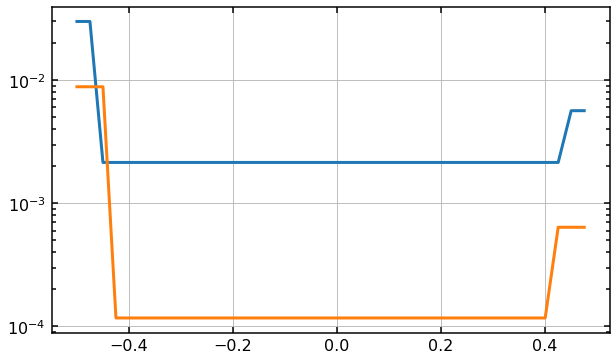

In [3]:
L = 20
N = 40
dx = L/N
x = np.arange(-10, 10, dx)
y = np.exp(x)
dty = np.exp(x)

df4all = fd4_all(y, x, dx)
df6all = fd6_all(y, x, dx)

plt.figure(figsize=(10, 6))
plt.semilogy(x/L, abs(df4all/dty-1), label='4th order FD')
plt.semilogy(x/L, abs(df6all/dty-1), label='6th order FD')
plt.grid()
plt.xlabel('x/L', size=spacetimenamesize)
plt.ylabel(r'$|FD(y)/\partial_{x}y -1|$', size=spacetimenamesize)
plt.title(r'$y=e^x,\;\;N=40$', size=spacetimenamesize)
plt.legend(prop={'size': legendsize})
plt.savefig('../ebweyl/Plots/FDscheme.pdf')

In [4]:
def f(x):
    s = 0
    for i in range(5):
        s += x**i
    return s
def dxf(x):
    s = 0
    for i in range(1,5):
        s += i*(x**(i-1))
    return s

In [5]:
ea4 = []
ea6 = []
eaa4 = []
eaa6 = []
eb4 = []
eb6 = []
ec4 = []
ec6 = []
ecc4 = []
ecc6 = []
allN = [int(np.ceil(i)) for i in np.geomspace(13, 150, 30)]
for N in allN:
    L = 1
    dx = L/N
    x = np.arange(-L/2, L/2, dx)
    xx, yy, zz = np.meshgrid(x,x,x, indexing='ij')
    
    ea4 += [np.mean(abs(np.array([[fd4_all(f(xx[:,j,k]), x, dx)/dxf(xx[:,j,k]) - 1 for j in range(N)]for k in range(N)])))]
    ea6 += [np.mean(abs(np.array([[fd6_all(f(xx[:,j,k]), x, dx)/dxf(xx[:,j,k]) - 1 for j in range(N)]for k in range(N)])))]
    
    x = x.astype('float128')
    xx, yy, zz = np.meshgrid(x,x,x, indexing='ij')
    eaa4 += [np.mean(abs(np.array([[fd4_all(f(xx[:,j,k]), x, dx)/dxf(xx[:,j,k]) - 1 for j in range(N)]for k in range(N)])))]
    eaa6 += [np.mean(abs(np.array([[fd6_all(f(xx[:,j,k]), x, dx)/dxf(xx[:,j,k]) - 1 for j in range(N)]for k in range(N)])))]
    x = x.astype('float64')
    L = 20
    dx = L/N
    x = np.arange(-L/2, L/2, dx)
    
    eb4 += [np.mean(abs(fd4_all(np.sin(x), x, dx)/np.cos(x) - 1))]
    eb6 += [np.mean(abs(fd6_all(np.sin(x), x, dx)/np.cos(x) - 1))]
    
    ec4 += [np.mean(abs(fd4_all(np.exp(x), x, dx)/np.exp(x) - 1))]
    ec6 += [np.mean(abs(fd6_all(np.exp(x), x, dx)/np.exp(x) - 1))]
    
    ecc4 += [np.mean(abs(fd4_all(np.exp(x), x, dx)/np.exp(x) - 1)[2:-2])]
    ecc6 += [np.mean(abs(fd6_all(np.exp(x), x, dx)/np.exp(x) - 1)[3:-3])]
    print(N)

13
15
16
17
19
20
22
24
26
28
31
33
36
39
43
47
51
55
60
65
71
77
84
91
99
108
117
127
138
150


In [6]:
xmin = 12
xmax = 160
legendsize = 16.5
spacetimenamesize = 31

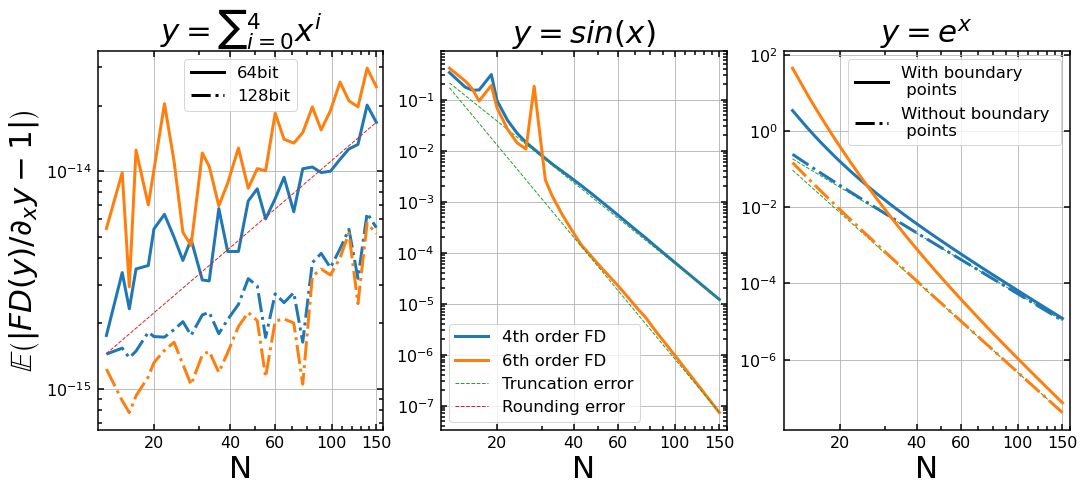

In [8]:
fig = plt.figure(figsize=(15, 6.66))

ax = fig.add_subplot(131)
ax.loglog(allN, ea4)
ax.loglog(allN, ea6)
ax.loglog(allN, eaa4, 'C0-.')
ax.loglog(allN, eaa6, 'C1-.')
ax.loglog(allN, [ea4[-1]*((allN[-1]/N)**(-1)) for N in allN], 'C3--', linewidth=1)
ax.loglog(allN, 0*np.array(allN), 'k-', label='64bit')
ax.loglog(allN, 0*np.array(allN), 'k-.', label='128bit')
ax.grid()
ax.set_ylabel(r'$\mathbb{E}\left(|FD(y)/\partial_{x}y -1|\right)$', size=spacetimenamesize)
ax.set_title(r'$y=\sum{}_{i=0}^{4}x^i$', size=spacetimenamesize)
ax.set_xlabel('N', size=spacetimenamesize)
ax.set_xlim(xmin, xmax)
#ax.set_ylim(1e-17, 1e-2)
xticks = list(np.arange(10, 180, 10))
ax.xaxis.set_minor_locator(FixedLocator(xticks))
ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
ax.xaxis.set_major_locator(FixedLocator([20,40,60,100,150]))
ax.xaxis.set_major_formatter(FixedFormatter(['20','40','60','100','150']))
ax.legend(prop={'size': legendsize})

ax = fig.add_subplot(132)
ax.loglog(allN, eb4, label='4th order FD')
ax.loglog(allN, [eb4[-1]*((allN[-1]/N)**4) for N in allN], 'C2--', linewidth=1)
ax.loglog(allN, eb6, label='6th order FD')
ax.loglog(allN, [eb6[-1]*((allN[-1]/N)**6) for N in allN], 'C2--', linewidth=1, label='Truncation error')
ax.loglog(allN, 0*np.array(allN), 'C3--', linewidth=1, label='Rounding error')
ax.grid()
ax.set_title(r'$y=sin(x)$', size=spacetimenamesize)
ax.set_xlabel('N', size=spacetimenamesize)
ax.set_xlim(xmin, xmax)
xticks = list(np.arange(10, 180, 10))
ax.xaxis.set_minor_locator(FixedLocator(xticks))
ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
ax.xaxis.set_major_locator(FixedLocator([20,40,60,100,150]))
ax.xaxis.set_major_formatter(FixedFormatter(['20','40','60','100','150']))
ax.legend(prop={'size': legendsize})

ax = fig.add_subplot(133)
ax.loglog(allN, [ecc4[-1]*((allN[-1]/N)**4) for N in allN], 'C2--', linewidth=1)
ax.loglog(allN, [ecc6[-1]*((allN[-1]/N)**6) for N in allN], 'C2--', linewidth=1)
ax.loglog(allN, ec4, color='C0')
ax.loglog(allN, ecc4, color='C0', linestyle='-.')
ax.loglog(allN, ec6, color='C1')
ax.loglog(allN, ecc6, color='C1', linestyle='-.')
ax.loglog(allN, 0*np.array(allN), 'k-', label='With boundary \n points')
ax.loglog(allN, 0*np.array(allN), 'k-.', label='Without boundary \n points')
ax.legend(prop={'size': legendsize})
ax.set_title(r'$y=e^x$', size=spacetimenamesize)
ax.grid()
ax.set_xlabel('N', size=spacetimenamesize)
ax.set_xlim(xmin, xmax)
xticks = list(np.arange(10, 180, 10))
ax.xaxis.set_minor_locator(FixedLocator(xticks))
ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
ax.xaxis.set_major_locator(FixedLocator([20,40,60,100,150]))
ax.xaxis.set_major_formatter(FixedFormatter(['20','40','60','100','150']))

fig.subplots_adjust(hspace=0, wspace=0.2, left=0.09, right=0.99 ,top=0.9, bottom=0.11)

plt.savefig('../ebweyl/Plots/FDtest.pdf')